<a href="https://colab.research.google.com/github/ronan777/Scripts-/blob/master/GetH11_DelayAmpLocate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install obspy

✨🍰✨ Everything looks OK!
Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



Segment 0 Time step: 250.0 360.0 segments
Shift and max: -1.192 0.6162918886730595
Segment 1 Time step: 250.0 360.0 segments
Segment 2 Time step: 250.0 360.0 segments
Shift and max: -1.132 0.5905380955375853
Segment 3 Time step: 250.0 360.0 segments
Shift and max: -1.188 0.6307393185820167
Segment 4 Time step: 250.0 360.0 segments
Segment 5 Time step: 250.0 360.0 segments
Segment 6 Time step: 250.0 360.0 segments
Shift and max: -1.116 0.5399038916678476
Segment 7 Time step: 250.0 360.0 segments
Segment 8 Time step: 250.0 360.0 segments
Segment 9 Time step: 250.0 360.0 segments
Shift and max: -0.728 0.539942886341684
Segment 10 Time step: 250.0 360.0 segments
Segment 11 Time step: 250.0 360.0 segments
Shift and max: -1.148 0.5666511369060172
Segment 12 Time step: 250.0 360.0 segments
Shift and max: -1.104 0.5752406532860711
Segment 13 Time step: 250.0 360.0 segments
Shift and max: -0.436 0.8352786135229827
Segment 14 Time step: 250.0 360.0 segments
Segment 15 Time step: 250.0 360.0 segm

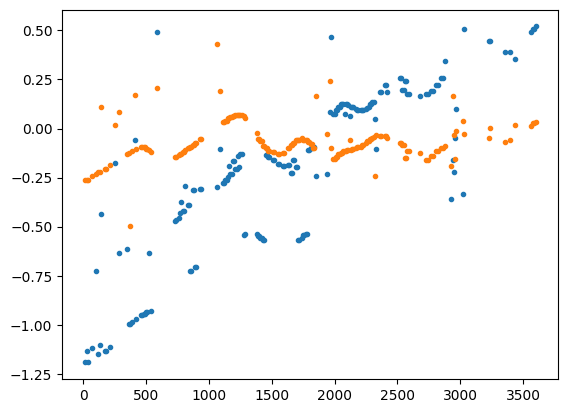

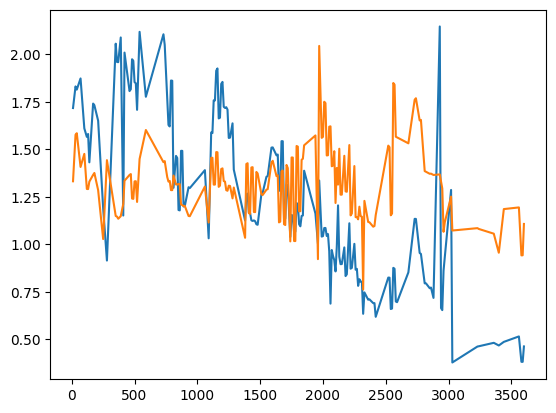

In [42]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import obspy.signal.cross_correlation as cc
import obspy.signal.filter as flt
import matplotlib.pyplot as plt
import numpy as np
import math
#
#
#starttime=UTCDateTime.utcnow()
starttime=UTCDateTime("2024-02-19 22:30:00") #earthquake southern east Pacific Rise
#
# Get epoch time from UTCDateTime
# Get two hours of data
#
dT = 20
Interval = 3600
nseg = 2*Interval/dT
k = 0
j = 0
mincor = 0.5
delay12=np.empty(0)
delay13=np.empty(0)
maxcor12=np.empty(0)
maxcor13=np.empty(0)
tpoints=np.empty(0)
A12=np.empty(0)
A13=np.empty(0)
while k < nseg:
  startseg = starttime+k*dT/2
  endseg = startseg+dT
  client = Client("IRIS")
#client = Client(base_url='https://fdsnws.raspberryshakedata.com/')
  w1 = client.get_waveforms("IM","H11S1","*","EDH",startseg,endseg, attach_response=False)
  w2 = client.get_waveforms("IM","H11S2","*","EDH",startseg,endseg, attach_response=False)
  w3 = client.get_waveforms("IM","H11S3","*","EDH",startseg,endseg, attach_response=False)
  n1 = len(w1)
  n2 = len(w2)
  if (n1 != 1): exit(1)
  dt = w1[0].stats.sampling_rate
  print ("Segment",k,"Time step:", dt, nseg, "segments")
  cross12=cc.correlate(w1[0],w2[0], shift=1000, demean=True, normalize=True, method='direct')
  cross13=cc.correlate(w1[0],w3[0], shift=1000, demean=True, normalize=True, method='direct')
  (shift12,max12)=cc.xcorr_max(cross12,abs_max=False)
  (shift13,max13)=cc.xcorr_max(cross13,abs_max=False)
  if (max12 > mincor and max13 > mincor):
    outdelay12=np.append(delay12,shift12/dt)
    outdelay13=np.append(delay13,shift13/dt)
    outmax12=np.append(maxcor12,max12)
    outmax13=np.append(maxcor13,max13)
    outtim=np.append(tpoints,(k+1)*dT/2.)
    delay12=outdelay12
    delay13=outdelay13
    maxcor12=outmax12
    maxcor13=outmax13
    tpoints=outtim
    print ("Shift and max:",shift12/dt,max12)
    env1=flt.envelope(w1[0].detrend(type='linear').data)
    env2=flt.envelope(w2[0].detrend(type='linear').data)
    env3=flt.envelope(w3[0].detrend(type='linear').data)
    outa12=np.append(A12,env1.max()/env2.max())
    outa13=np.append(A13,env1.max()/env3.max())
    A12=outa12
    A13=outa13
#  plt.plot(tseg,env1,'r-',tseg,env2,'g-',tseg,env3,'b-')
#  plt.show()
  k+=1
#print(delays,maxcor,tpoints)
plt.plot(tpoints,delay12,'.',tpoints,delay13,'.')
plt.show()
plt.plot(tpoints,A12,tpoints,A13)

